# Product Amount Forecast by Time

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Indest Data

In [2]:
df = pd.read_csv("Frozen_Dessert_Production.csv")

In [3]:
df.head()

,DATE,IPN31152N
0,1972-01-01,59.962
1,1972-02-01,67.061
2,1972-03-01,74.235
3,1972-04-01,78.112
4,1972-05-01,84.764


In [4]:
df = df.set_index("DATE")

In [5]:
df

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0+ KB


## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [7]:
df.columns = ['Production']

<AxesSubplot:xlabel='DATE'>

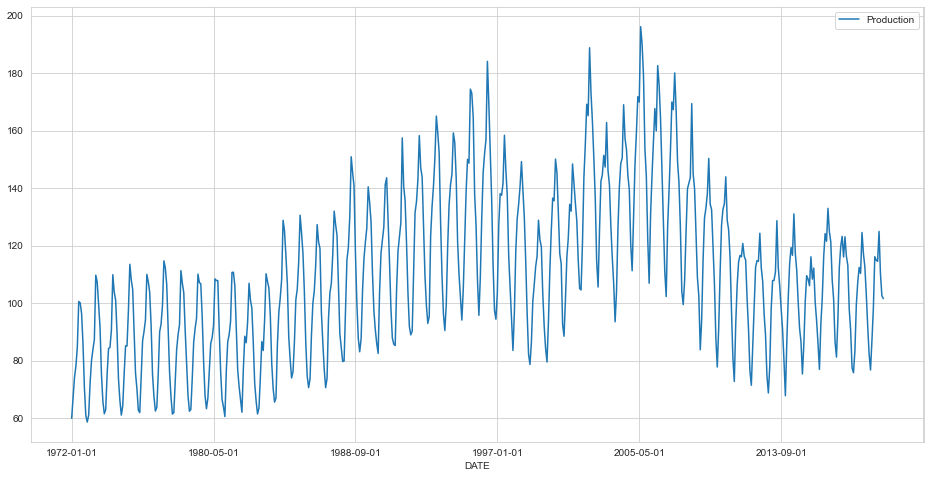

In [8]:
df.plot(figsize=(16,8))

## Preprocessing of Data

### Train Test Split

In [9]:
len(df)

573

In [10]:
test_point = np.round(len(df)*0.15)
test_point

86.0

In [11]:
test_ind = int(len(df) - test_point)
test_ind

487

In [12]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [13]:
test

,Production
DATE,
2012-08-01,107.643
2012-09-01,96.370
2012-10-01,88.886
2012-11-01,74.838
2012-12-01,68.769
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [14]:
train

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2012-03-01,112.487
2012-04-01,114.811
2012-05-01,114.566


### Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [18]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [19]:
length = 2
batch_size = 1
stride = 1 
generator = TimeseriesGenerator(data = train_scaled,
                                targets = train_scaled,
                                length = length,
                                batch_size = batch_size,
                                stride = stride)

In [20]:
len(train_scaled)

487

In [21]:
len(generator)

485

<AxesSubplot:xlabel='DATE'>

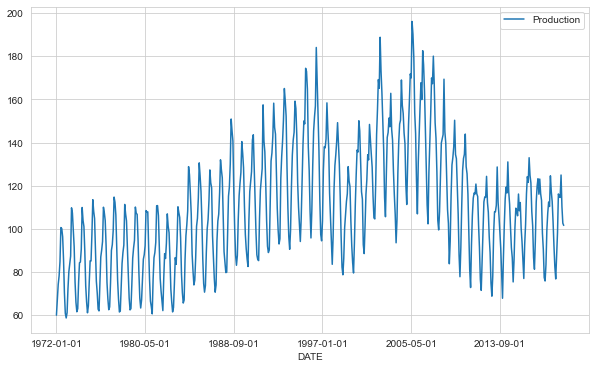

In [22]:
df.plot()

In [23]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size)

In [24]:
X, y = generator[0]

In [25]:
len(generator)

475

In [26]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n{y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
[[0.01774221]]


## Modelling & Model Performance

### Import related libraries

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [28]:
model = Sequential()
model.add(SimpleRNN(units = 80, activation = "tanh", input_shape=(length, 1)))
model.add(Dense(units = 1))
model.compile(optimizer='adam', loss='mse')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 80)                6560      
_________________________________________________________________
dense (Dense)                (None, 1)                 81        
Total params: 6,641
Trainable params: 6,641
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit_generator(generator = generator, epochs = 5)

Epoch 1/5
475/475 [==============================] - 5s 6ms/step - loss: 0.0103
Epoch 2/5
475/475 [==============================] - 3s 6ms/step - loss: 0.0045
Epoch 3/5
475/475 [==============================] - 3s 6ms/step - loss: 0.0038
Epoch 4/5
475/475 [==============================] - 3s 7ms/step - loss: 0.0042
Epoch 5/5
475/475 [==============================] - 3s 6ms/step - loss: 0.0035


<AxesSubplot:>

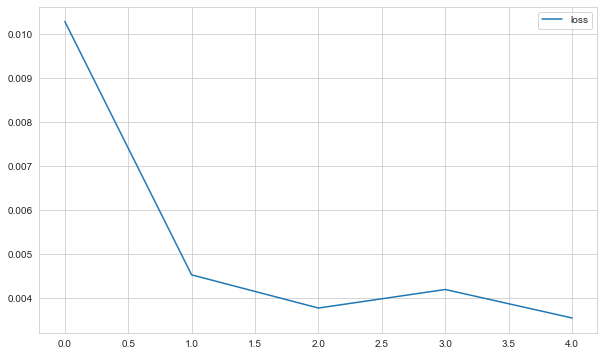

In [31]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

#### Evaluate on Test Data

In [32]:
first_eval_batch = train_scaled[-length:]

In [33]:
first_eval_batch.shape

(12, 1)

In [34]:
first_eval_batch = first_eval_batch.reshape((1, length, 1))

In [35]:
first_eval_batch.shape

(1, 12, 1)

In [36]:
model.predict(first_eval_batch)

array([[0.34673828]], dtype=float32)

In [37]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, 1))

In [38]:
current_batch.shape

(1, 12, 1)

In [39]:
np.append(current_batch[:,1:,:], [[[0.34673828]]], axis = 1)

array([[[0.31339595],
        [0.23591506],
        [0.12980579],
        [0.09307932],
        [0.19444507],
        [0.29743684],
        [0.39142952],
        [0.40833181],
        [0.40654945],
        [0.47764626],
        [0.39026746],
        [0.34673828]]])

In [40]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, 1))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)
    
    predictions_scaled.append(current_pred[0]) 
    
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [41]:
predictions_scaled

[array([0.34673828], dtype=float32),
 array([0.29807183], dtype=float32),
 array([0.25409546], dtype=float32),
 array([0.20365486], dtype=float32),
 array([0.17644061], dtype=float32),
 array([0.20915806], dtype=float32),
 array([0.28160167], dtype=float32),
 array([0.35864076], dtype=float32),
 array([0.40966967], dtype=float32),
 array([0.44718492], dtype=float32),
 array([0.46548524], dtype=float32),
 array([0.43809512], dtype=float32),
 array([0.3848844], dtype=float32),
 array([0.3261831], dtype=float32),
 array([0.27590793], dtype=float32),
 array([0.23659547], dtype=float32),
 array([0.21852607], dtype=float32),
 array([0.23598516], dtype=float32),
 array([0.28689522], dtype=float32),
 array([0.35185346], dtype=float32),
 array([0.41053465], dtype=float32),
 array([0.453808], dtype=float32),
 array([0.47304288], dtype=float32),
 array([0.45985273], dtype=float32),
 array([0.41794762], dtype=float32),
 array([0.36190403], dtype=float32),
 array([0.3078503], dtype=float32),
 array

In [42]:
test_scaled

array([[0.35620545],
       [0.27422828],
       [0.2198076 ],
       [0.11764411],
       [0.07351475],
       [0.14149624],
       [0.2863296 ],
       [0.35795581],
       [0.35814561],
       [0.37998486],
       [0.50926561],
       [0.39057433],
       [0.34465461],
       [0.28747203],
       [0.23516459],
       [0.15569044],
       [0.06649001],
       [0.20170834],
       [0.31321197],
       [0.40080166],
       [0.44136265],
       [0.42156466],
       [0.52634606],
       [0.42622818],
       [0.38365722],
       [0.30511534],
       [0.23707931],
       [0.20297948],
       [0.12155208],
       [0.19574094],
       [0.30468338],
       [0.37028329],
       [0.36143183],
       [0.34467716],
       [0.41797884],
       [0.36154745],
       [0.38938173],
       [0.30315844],
       [0.25649698],
       [0.19782873],
       [0.13318726],
       [0.24834362],
       [0.3149827 ],
       [0.41828135],
       [0.4766849 ],
       [0.45728977],
       [0.54050318],
       [0.481

#### Inverse Transformations and Comparing

In [43]:
predictions = scaler.inverse_transform(predictions_scaled)

In [44]:
predictions

array([[106.34113301],
       [ 99.64882002],
       [ 93.60145836],
       [ 86.66517343],
       [ 82.9228366 ],
       [ 87.42194095],
       [ 97.38394353],
       [107.97788963],
       [114.99507369],
       [120.15394241],
       [122.67049143],
       [118.90396888],
       [111.58675314],
       [103.51451164],
       [ 96.60097601],
       [ 91.19496535],
       [ 88.7101715 ],
       [ 91.11103968],
       [ 98.11187998],
       [107.04454152],
       [115.11402082],
       [121.06470925],
       [123.70977068],
       [121.89594168],
       [116.13340724],
       [108.42663391],
       [100.99349554],
       [ 95.36398157],
       [ 92.76991447],
       [ 94.19462029],
       [ 99.54077419],
       [107.26306753],
       [115.18710462],
       [121.46104123],
       [124.6918181 ],
       [124.03584254],
       [119.65391284],
       [112.8584883 ],
       [105.57997218],
       [ 99.65731156],
       [ 96.51914248],
       [ 97.0232416 ],
       [101.14846615],
       [107

In [45]:
test

,Production
DATE,
2012-08-01,107.643
2012-09-01,96.370
2012-10-01,88.886
2012-11-01,74.838
2012-12-01,68.769
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [46]:
test['RNN_Predictions'] = predictions

In [47]:
test

,Production,RNN_Predictions
DATE,,
2012-08-01,107.643,106.341
2012-09-01,96.370,99.649
2012-10-01,88.886,93.601
2012-11-01,74.838,86.665
2012-12-01,68.769,82.923
...,...,...
2019-05-01,114.561,121.779
2019-06-01,124.960,126.400
2019-07-01,110.263,128.721


<AxesSubplot:xlabel='DATE'>

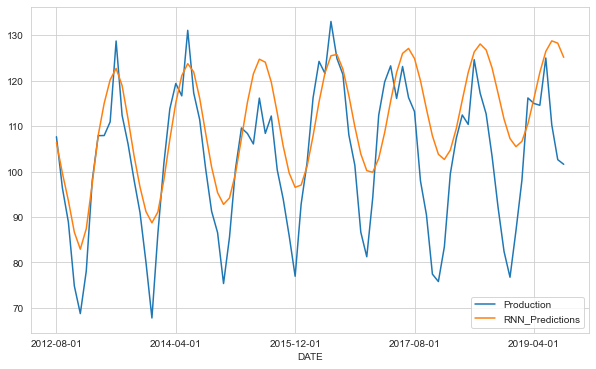

In [48]:
test.plot()

#### Calculation R2 Score and Error Metrics

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [50]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [51]:
eval_metrics(test.Production, test.RNN_Predictions)

r2_score: 0.3502512605806377 
mae: 10.070514879874672 
mse: 159.73330063474967 
rmse: 12.63856402581993


### with "relu" activation function

In [52]:
model = Sequential()
model.add(SimpleRNN(units = 80, activation = "relu", input_shape=(length, 1)))
model.add(Dense(units = 1))
model.compile(optimizer='adam', loss='mse')

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 80)                6560      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 81        
Total params: 6,641
Trainable params: 6,641
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.fit_generator(generator = generator, epochs = 5)

Epoch 1/5
475/475 [==============================] - 4s 6ms/step - loss: 0.0099
Epoch 2/5
475/475 [==============================] - 3s 6ms/step - loss: 0.0039
Epoch 3/5
475/475 [==============================] - 3s 7ms/step - loss: 0.0027
Epoch 4/5
475/475 [==============================] - 4s 7ms/step - loss: 0.0029
Epoch 5/5
475/475 [==============================] - 3s 6ms/step - loss: 0.0025


#### Evaluate on Test Data

In [55]:
first_eval_batch = train_scaled[-length:]

In [56]:
first_eval_batch.shape

(12, 1)

In [57]:
first_eval_batch = first_eval_batch.reshape((1, length, 1))

In [58]:
first_eval_batch.shape

(1, 12, 1)

In [60]:
model.predict(first_eval_batch)

array([[0.33611423]], dtype=float32)

In [61]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, 1))

In [62]:
np.append(current_batch[:,1:,:], [[[0.33611423]]], axis = 1)

array([[[0.31339595],
        [0.23591506],
        [0.12980579],
        [0.09307932],
        [0.19444507],
        [0.29743684],
        [0.39142952],
        [0.40833181],
        [0.40654945],
        [0.47764626],
        [0.39026746],
        [0.33611423]]])

In [63]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, 1))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)
    
    predictions_scaled.append(current_pred[0]) 
    
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [64]:
predictions_scaled

[array([0.33611423], dtype=float32),
 array([0.2234455], dtype=float32),
 array([0.13583928], dtype=float32),
 array([0.1270311], dtype=float32),
 array([0.1982683], dtype=float32),
 array([0.3363988], dtype=float32),
 array([0.4232538], dtype=float32),
 array([0.47345257], dtype=float32),
 array([0.57709754], dtype=float32),
 array([0.6371455], dtype=float32),
 array([0.59365916], dtype=float32),
 array([0.5121355], dtype=float32),
 array([0.3826728], dtype=float32),
 array([0.25454062], dtype=float32),
 array([0.16042471], dtype=float32),
 array([0.1648525], dtype=float32),
 array([0.27885544], dtype=float32),
 array([0.45286044], dtype=float32),
 array([0.532537], dtype=float32),
 array([0.5865596], dtype=float32),
 array([0.69538915], dtype=float32),
 array([0.73294777], dtype=float32),
 array([0.66273004], dtype=float32),
 array([0.5571638], dtype=float32),
 array([0.4179462], dtype=float32),
 array([0.2805632], dtype=float32),
 array([0.1951868], dtype=float32),
 array([0.2303873

In [65]:
test_scaled

array([[0.35620545],
       [0.27422828],
       [0.2198076 ],
       [0.11764411],
       [0.07351475],
       [0.14149624],
       [0.2863296 ],
       [0.35795581],
       [0.35814561],
       [0.37998486],
       [0.50926561],
       [0.39057433],
       [0.34465461],
       [0.28747203],
       [0.23516459],
       [0.15569044],
       [0.06649001],
       [0.20170834],
       [0.31321197],
       [0.40080166],
       [0.44136265],
       [0.42156466],
       [0.52634606],
       [0.42622818],
       [0.38365722],
       [0.30511534],
       [0.23707931],
       [0.20297948],
       [0.12155208],
       [0.19574094],
       [0.30468338],
       [0.37028329],
       [0.36143183],
       [0.34467716],
       [0.41797884],
       [0.36154745],
       [0.38938173],
       [0.30315844],
       [0.25649698],
       [0.19782873],
       [0.13318726],
       [0.24834362],
       [0.3149827 ],
       [0.41828135],
       [0.4766849 ],
       [0.45728977],
       [0.54050318],
       [0.481

#### Inverse Transformations and Comparing

In [66]:
predictions = scaler.inverse_transform(predictions_scaled)

In [67]:
predictions

array([[104.88017831],
       [ 89.38666282],
       [ 77.33958964],
       [ 76.12834236],
       [ 85.9244464 ],
       [104.91931234],
       [116.86308134],
       [123.7661091 ],
       [138.01873274],
       [146.27616522],
       [140.29618671],
       [129.08555071],
       [111.28262732],
       [ 93.66267367],
       [ 80.72042743],
       [ 81.32931019],
       [ 97.0062995 ],
       [120.93440592],
       [131.89103749],
       [139.31989731],
       [154.28547425],
       [159.45030591],
       [149.7943922 ],
       [135.27756363],
       [116.13321053],
       [ 97.24114058],
       [ 85.50069724],
       [ 90.34126846],
       [112.14039171],
       [135.29309594],
       [144.42626356],
       [153.46680291],
       [169.27234561],
       [168.82039241],
       [157.32613407],
       [140.0194166 ],
       [120.84989624],
       [101.97140375],
       [ 92.07222709],
       [102.08063806],
       [128.46548797],
       [149.37413473],
       [157.72860519],
       [169

In [68]:
test['Relu_Predictions'] = predictions

In [69]:
test

,Production,RNN_Predictions,Relu_Predictions
DATE,,,
2012-08-01,107.643,106.341,104.880
2012-09-01,96.370,99.649,89.387
2012-10-01,88.886,93.601,77.340
2012-11-01,74.838,86.665,76.128
2012-12-01,68.769,82.923,85.924
...,...,...,...
2019-05-01,114.561,121.779,190.412
2019-06-01,124.960,126.400,170.805
2019-07-01,110.263,128.721,150.214


<AxesSubplot:xlabel='DATE'>

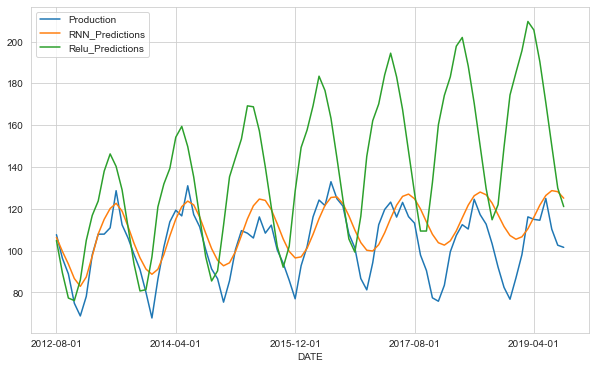

In [70]:
test.plot()

#### Calculation R2 Score and Error Metrics

In [71]:
eval_metrics(test.Production, test.Relu_Predictions)

r2_score: -8.137696320113392 
mae: 37.91468854731101 
mse: 2246.398191882699 
rmse: 47.39618330501623
